FB-22, Venher Pavlo, lab 4, part 2

Imports

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

1

In [21]:
wine_df = pd.read_csv('dbs/wine.csv')
wine_df = wine_df.dropna()
wine_np = wine_df.to_numpy()
print(wine_df)

     Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176    13.17       2.59  2.37               20.0        120           1.65   
177    14.13       4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid_phenols  Proanthocyanins  Color_i

2

In [22]:
col = 'Color_intensity'
#dataframe
min_val = wine_df[col].min()
max_val = wine_df[col].max()
wine_df[col] = (wine_df[col] - min_val) / (max_val - min_val)
print(wine_df[col])

#numpy array
col = 9
min_val = np.min(wine_np[:, col])
max_val = np.max(wine_np[:, col])
wine_np[:, col] = (wine_np[:, col] - min_val) / (max_val - min_val)
print(wine_np[:, col])


0      0.372014
1      0.264505
2      0.375427
3      0.556314
4      0.259386
         ...   
173    0.547782
174    0.513652
175    0.761092
176    0.684300
177    0.675768
Name: Color_intensity, Length: 178, dtype: float64
[0.37201365 0.26450512 0.37542662 0.55631399 0.25938567 0.46672355
 0.3387372  0.32167235 0.33447099 0.50682594 0.38139932 0.31740614
 0.36860068 0.35153584 0.53071672 0.51365188 0.41979522 0.45392491
 0.6331058  0.32593857 0.37286689 0.27474403 0.21501706 0.22610922
 0.19112628 0.19624573 0.3003413  0.2278157  0.27474403 0.29180887
 0.37713311 0.47952218 0.21843003 0.35153584 0.24914676 0.32593857
 0.28327645 0.25341297 0.20648464 0.32593857 0.41382253 0.2559727
 0.35409556 0.26279863 0.32081911 0.33788396 0.30887372 0.4112628
 0.41979522 0.65017065 0.50511945 0.36860068 0.49232082 0.42832765
 0.38993174 0.42406143 0.43515358 0.40273038 0.47098976 0.05716724
 0.16979522 0.38139932 0.21501706 0.27047782 0.14249147 0.28327645
 0.34300341 0.29010239 0.1612628  0.13

3

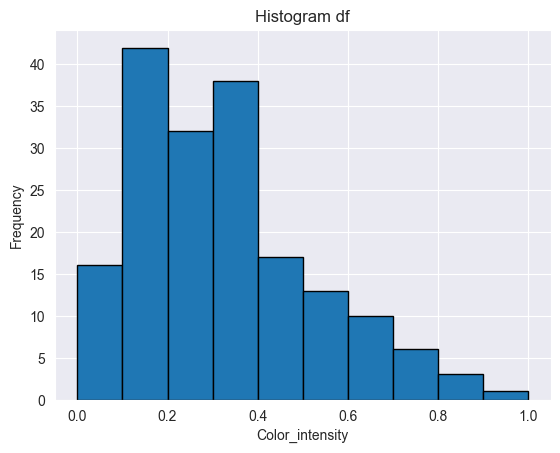

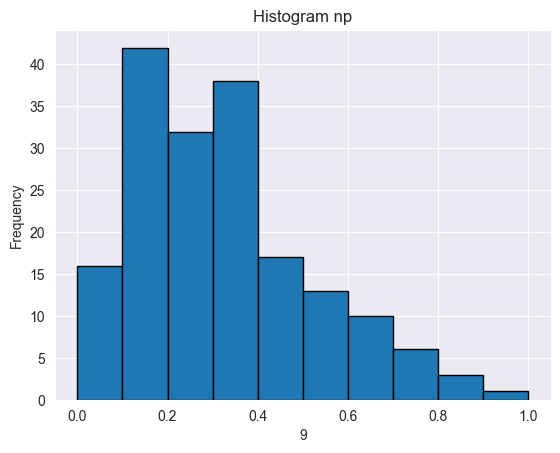

In [23]:
#dataframe
col = 'Color_intensity'
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.hist(wine_df[col], bins=bins, edgecolor='black')
plt.title(f'Histogram df')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()

# numpy array
col = 9
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.hist(wine_np[:, col], bins=bins, edgecolor='black')
plt.title(f'Histogram np')
plt.xlabel(col)
plt.ylabel('Frequency')
plt.show()

#### Збудувати графік залежності одного integer/real атрибута від іншого.

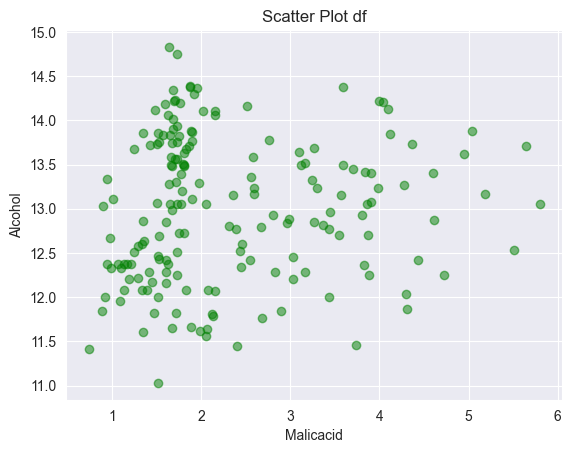

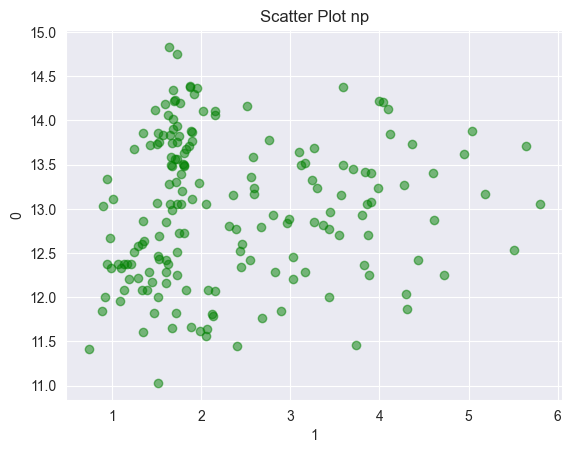

In [24]:
#dataframe
x_attribute = 'Malicacid'
y_attribute = 'Alcohol'
plt.scatter(wine_df[x_attribute], wine_df[y_attribute], color='green', alpha=0.5)
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.title(f'Scatter Plot df')
plt.grid(True)
plt.show()

# numpy array
x_attribute = 1
y_attribute = 0
plt.scatter(wine_np[:, x_attribute], wine_np[:, y_attribute], color='green', alpha=0.5)
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)
plt.title(f'Scatter Plot np')
plt.grid(True)
plt.show()

5

In [25]:
# Dataframe
attribute1 = 'Malicacid'
attribute2 = 'Alcohol'
pearson_corr = wine_df[attribute1].corr(wine_df[attribute2])
spearman_corr = wine_df[attribute1].corr(wine_df[attribute2], method='spearman')
print(f'df pearson: {pearson_corr}')
print(f'df spearman: {spearman_corr}')

# numpy array
attribute1 = 1
attribute2 = 0
pearson_corr, _ = pearsonr(wine_np[:, attribute1], wine_np[:, attribute2])
spearman_corr, _ = spearmanr(wine_np[:, attribute1], wine_np[:, attribute2])
print(f'np pearson: {pearson_corr}')
print(f'np spearman: {spearman_corr}')


df pearson: 0.09439694091041406
df spearman: 0.1404301775567423
np pearson: 0.09439694091041399
np spearman: 0.1404301775567423


6

In [26]:
wine_df = pd.read_csv('dbs/wine.csv')
col = 'Alcohol'
encoder = OneHotEncoder()
bins = [0, 13, 14, float('inf')] 
labels = ['1', '2', '3']
wine_df[f'{col}_Category'] = pd.cut(wine_df[col], bins=bins, labels=labels)
print(wine_df['Alcohol_Category'])
encoded_data = encoder.fit_transform(wine_df[['Alcohol_Category']])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.categories_[0])
result_df = pd.concat([wine_df, encoded_df], axis=1)
print("\nEncoded DataFrame:")
print(result_df)

0      3
1      2
2      2
3      3
4      2
      ..
173    2
174    2
175    2
176    2
177    3
Name: Alcohol_Category, Length: 178, dtype: category
Categories (3, object): ['1' < '2' < '3']

Encoded DataFrame:
     Alcohol  Malicacid   Ash  Alcalinity_of_ash  Magnesium  Total_phenols  \
0      14.23       1.71  2.43               15.6        127           2.80   
1      13.20       1.78  2.14               11.2        100           2.65   
2      13.16       2.36  2.67               18.6        101           2.80   
3      14.37       1.95  2.50               16.8        113           3.85   
4      13.24       2.59  2.87               21.0        118           2.80   
..       ...        ...   ...                ...        ...            ...   
173    13.71       5.65  2.45               20.5         95           1.68   
174    13.40       3.91  2.48               23.0        102           1.80   
175    13.27       4.28  2.26               20.0        120           1.59   
176   

7

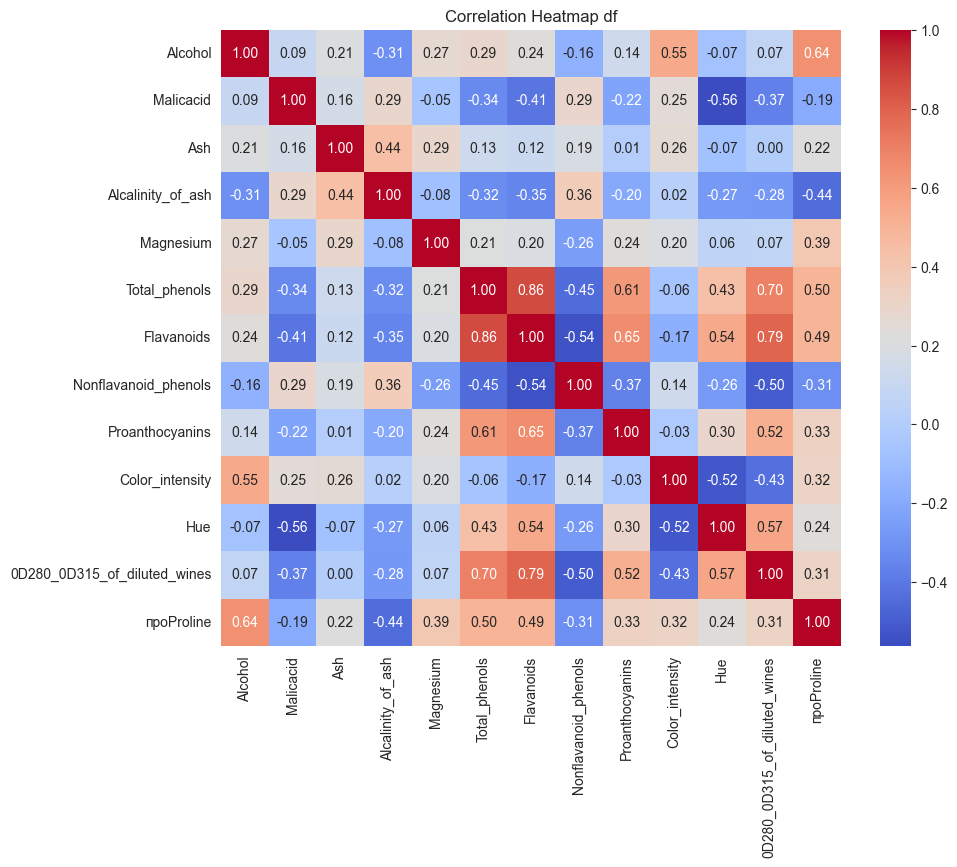

In [27]:
wine_df = pd.read_csv('dbs/wine.csv')
corr_matrix = wine_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap df')
plt.show()